|           실습 #1          |
데이터셋:
     height  weight  label
0    152.6    44.7   11.5
1    160.4    39.9   15.8
2    112.2    21.1    6.6
3    159.3    46.4   15.6
4    150.9    46.6   11.0
..     ...     ...    ...
75   164.7    55.5   16.3
76   100.2    14.1    3.3
77   170.1    52.1   18.1
78   152.0    48.8   13.7
79   114.1    18.6    5.2

[80 rows x 3 columns]


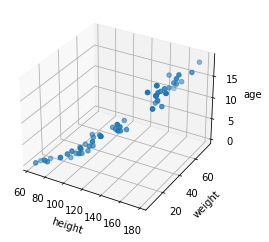

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("==============================")
print("|           실습 #1          |")
print("==============================")

# 데이터 셋 읽어들이비다.
data = pd.read_csv("multiple_linear_regression_data.csv")
print("데이터셋:\n",data)

# 데이터 특성에 따른 값으로 변수에 저장
height = np.array(data["height"])
weight = np.array(data["weight"])
label = np.array(data["label"])

# 실습 1 출력
ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(height, weight, label)
ax.set_xlabel("height"); ax.set_ylabel("weight"); ax.set_zlabel("age", rotation=0)
plt.show()

# csv파일 데이터 크기 80 x 3
data_size = data.shape

# height과 weight을 하나의 데이터 x로 묶고 결과 값인 label을 따로 묶었습니다. 
x= np.c_[height, weight]
y = label

|           실습 #2          |
최적 세타 값 :  [-12.27584624   0.16248137   0.01980255]
설정한 좌표 범위:
 [60.0, 180.0] [0.0, 80.0]
height 2d :
 [[ 60.          60.12012012  60.24024024 ... 179.75975976 179.87987988
  180.        ]
 [ 60.          60.12012012  60.24024024 ... 179.75975976 179.87987988
  180.        ]
 [ 60.          60.12012012  60.24024024 ... 179.75975976 179.87987988
  180.        ]
 ...
 [ 60.          60.12012012  60.24024024 ... 179.75975976 179.87987988
  180.        ]
 [ 60.          60.12012012  60.24024024 ... 179.75975976 179.87987988
  180.        ]
 [ 60.          60.12012012  60.24024024 ... 179.75975976 179.87987988
  180.        ]]
weight 2d : [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.08008008  0.08008008  0.08008008 ...  0.08008008  0.08008008
   0.08008008]
 [ 0.16016016  0.16016016  0.16016016 ...  0.16016016  0.16016016
   0.16016016]
 ...
 [79.83983984 79.83983984 79.83983984 ... 79.83983984 79.83983984
  79.83983984]
 [79.91

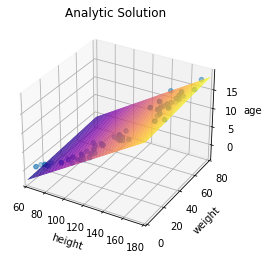

In [5]:
print("==============================")
print("|           실습 #2          |")
print("==============================")

# 기존 데이터에 bias를 추가했습니다.
# bias, height, weight
x_bias = np.c_[np.ones(data_size[0]), x]
#print("bias, height, weight\n",x_bias)


# 유사역행렬 (pseudoinverse inverse matrix) = Moore-Penrose inverse mastrx
#  square matrix가 아니거나 어떤 특성이 중복되어 행렬 X^T X의 역행렬이 없다면 정규방정식 동작안한다.
x_bias_t = x_bias.T
#행렬 계산을 통한 theta값 : bias, height, weight
theta = np.linalg.pinv(x_bias_t.dot(x_bias)).dot(x_bias_t).dot(y)
print("최적 세타 값 : ", theta)

# x축(height)과 y축(weight)의 좌표 구간을 설정하기 위한 최대 최소 설정
# 최소 구간 : 1의 자리에서 내림
# 최대 구간 : 1의 자리에서 올림
# 모든 구간 포함할 수 있게 설정
height_min = (min(height))
height_max = (max(height))
height_lim = [(height_min//10) * 10 ,(height_max // 10 + 1) * 10]

weight_min = (min(weight))
weight_max = (max(weight))
weight_lim = [(weight_min//10)*10, (weight_max // 10 +1) * 10]
print("설정한 좌표 범위:\n", height_lim, weight_lim)

# 각 자리의 시작부터 끝지점까지 동일한 간격으로 1000개의 데이터 생성
height_space = np.linspace(height_lim[0], height_lim[1], 1000)
weight_space = np.linspace(weight_lim[0], weight_lim[1], 1000)

# 데이터 1차원에서 2차원으로 확장
height_mesh, weight_mesh = np.meshgrid(height_space, weight_space)
print("height 2d :\n {}\nweight 2d : {}".format(height_mesh,weight_mesh))

# 가중치를 사용하여 평면을 만든다.
y_space = theta[2]*weight_mesh + theta[1]*height_mesh + theta[0]
print(y_space)

def origin_data_space():
    ax = plt.figure().add_subplot(projection='3d')
    ax.scatter(height,weight,label)
    ax.axis(height_lim + weight_lim)
    ax.set_xlabel('height'); ax.set_ylabel('weight'); ax.set_zlabel('age', rotation=0)
    ax.plot_surface(height_mesh, weight_mesh, y_space, cmap="plasma")
    plt.title("Analytic Solution")
    plt.grid(True)
    plt.show()
    
origin_data_space()

In [6]:
print("==============================")
print("|           실습 #3          |")
print("==============================")

# y의 예측값을 구하기 위해 비교 대상인 y와 대응하는 동일한 데이터 x사용함
# 따라서 height, weight을 사용함
y_pred_eq = theta[2]*weight + theta[1]*height + theta[0] # 수식 사용
y_pred_matrix = x_bias @ theta # 행렬 곱 사용

# mse값을 만드는 함수 y의 예측값과 y 원본 값, 데이터의 갯수를 받는다.
def calc_mse(y_pred, y_origin, size):
    return sum((y_pred - y_origin) ** 2) / size

# mse, data_size는 x의 모양 80 X 3이다. 따라서 data_size[0]은 80
mse_eq = calc_mse(y_pred_eq, y, data_size[0])
mse_matrix = calc_mse(y_pred_matrix, y, data_size[0])
print("mse eq값 : ", mse_eq)
print("mse matrix값 : ", mse_matrix)

|           실습 #3          |
mse eq값 :  1.842543756114169
mse matrix값 :  1.8425437561141684


|           실습 #4          |
임의의 초기 theta값 : bias GD = 0.5305521632365878, height GD = 7.1332623749101725, weight GD = 2.996198571161202) : 
초기 learning rate :  5.5e-05
초기 반복 값 :  200000

Learning Rate에 따른 변화


C:\Users\parks\AppData\Local\Temp/ipykernel_5024/3193773551.py:12: RuntimeWarning: overflow encountered in double_scalars
  return sum((y_pred - y_origin) ** 2) / size
C:\Users\parks\AppData\Local\Temp/ipykernel_5024/3193773551.py:12: RuntimeWarning: overflow encountered in square
  return sum((y_pred - y_origin) ** 2) / size
C:\Users\parks\AppData\Local\Temp/ipykernel_5024/1839852383.py:65: RuntimeWarning: invalid value encountered in subtract
  th = th - rate * gradient
C:\Users\parks\AppData\Local\Temp/ipykernel_5024/1839852383.py:39: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(height_mesh, weight_mesh, y_pred, alpha=0.7,cmap="plasma", rstride=100,cstride=100, edgecolor="black")


[Epoch]:200000, [최종반복 횟수]:200000, [Learning rate]:0.0001 ===> [W초기]:[0.53055216 7.13326237 2.99619857], [gradient]:[nan nan nan], MSE값:nan
[Epoch]:200000, [최종반복 횟수]:200000, [Learning rate]:5e-05 ===> [W초기]:[0.53055216 7.13326237 2.99619857], [gradient]:[-4.43528495  0.06948519  0.15306719], MSE값:3.342227
[Epoch]:200000, [최종반복 횟수]:22375, [Learning rate]:1e-06 ===> [W초기]:[0.53055216 7.13326237 2.99619857], [gradient]:[0.47896646 0.0101     0.24077615], MSE값:5.813554


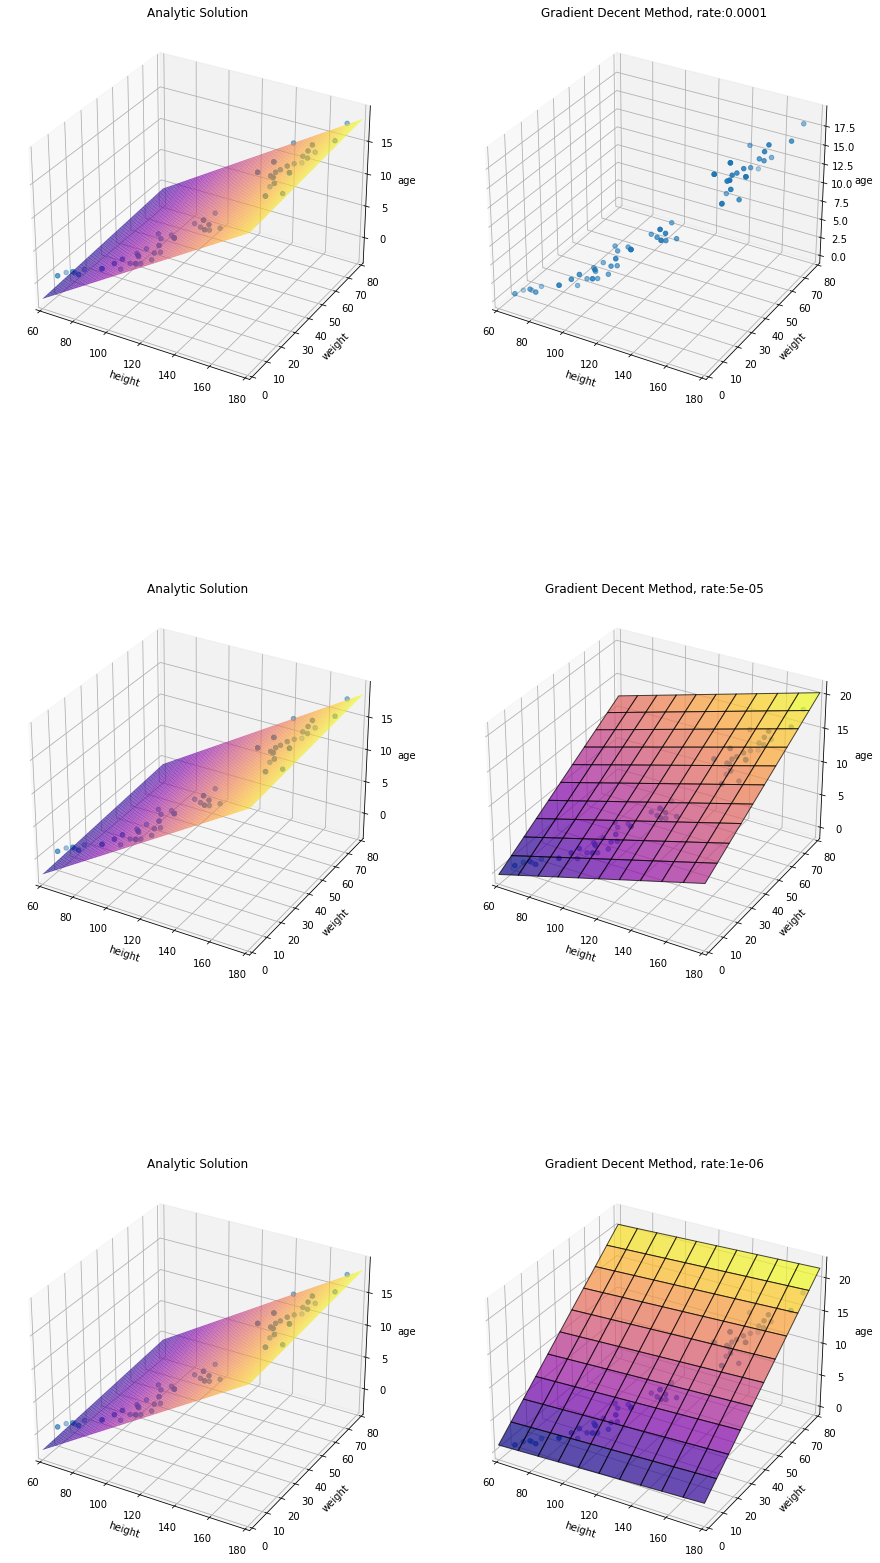

[Epoch]:200000, [최종반복 횟수]:200000, [Learning rate]:5.7e-05 ===> [W초기]:[0.53055216 7.13326237 2.99619857], [gradient]:[nan nan nan], MSE값:nan
[Epoch]:200000, [최종반복 횟수]:200000, [Learning rate]:5.5e-05 ===> [W초기]:[0.53055216 7.13326237 2.99619857], [gradient]:[-4.80849198  0.07391177  0.14672386], MSE값:3.202856
[Epoch]:200000, [최종반복 횟수]:200000, [Learning rate]:5.3e-05 ===> [W초기]:[0.53055216 7.13326237 2.99619857], [gradient]:[-4.66138965  0.072167    0.14922413], MSE값:3.256979


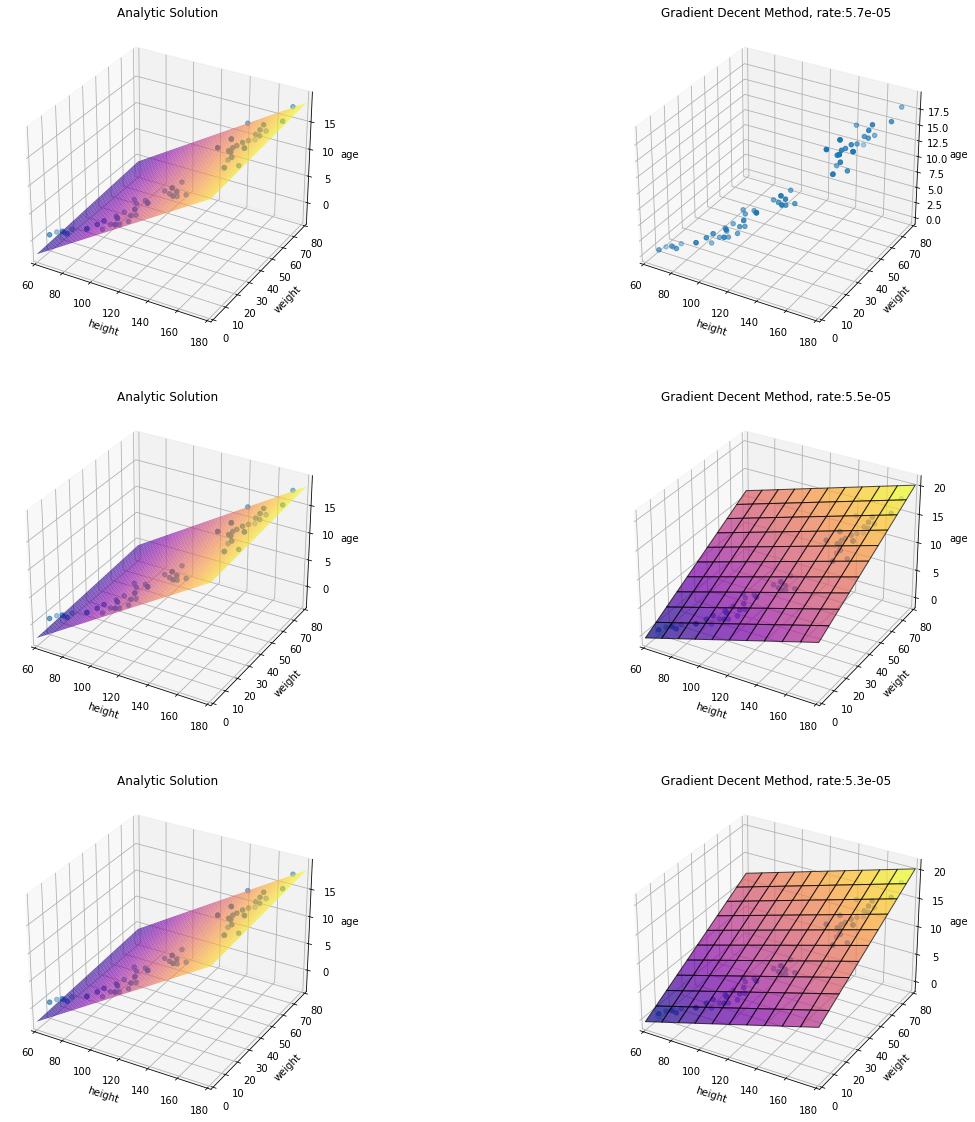


Epoch에 따른 변화
[Epoch]:20000, [최종반복 횟수]:20000, [Learning rate]:5.5e-05 ===> [W초기]:[0.53055216 7.13326237 2.99619857], [gradient]:[-0.17397723  0.01894222  0.22549589], MSE값:5.415355
[Epoch]:50000, [최종반복 횟수]:50000, [Learning rate]:5.5e-05 ===> [W초기]:[0.53055216 7.13326237 2.99619857], [gradient]:[-1.10966089  0.03004027  0.20959224], MSE값:4.884233
[Epoch]:100000, [최종반복 횟수]:100000, [Learning rate]:5.5e-05 ===> [W초기]:[0.53055216 7.13326237 2.99619857], [gradient]:[-2.51114845  0.04666319  0.1857714 ], MSE값:4.168614
[Epoch]:200000, [최종반복 횟수]:200000, [Learning rate]:5.5e-05 ===> [W초기]:[0.53055216 7.13326237 2.99619857], [gradient]:[-4.80849198  0.07391177  0.14672386], MSE값:3.202856
[Epoch]:500000, [최종반복 횟수]:500000, [Learning rate]:5.5e-05 ===> [W초기]:[0.53055216 7.13326237 2.99619857], [gradient]:[-8.93627586  0.12287103  0.07656464], MSE값:2.114617
[Epoch]:800000, [최종반복 횟수]:800000, [Learning rate]:5.5e-05 ===> [W초기]:[0.53055216 7.13326237 2.99619857], [gradient]:[-10.78231454   0.14476672   

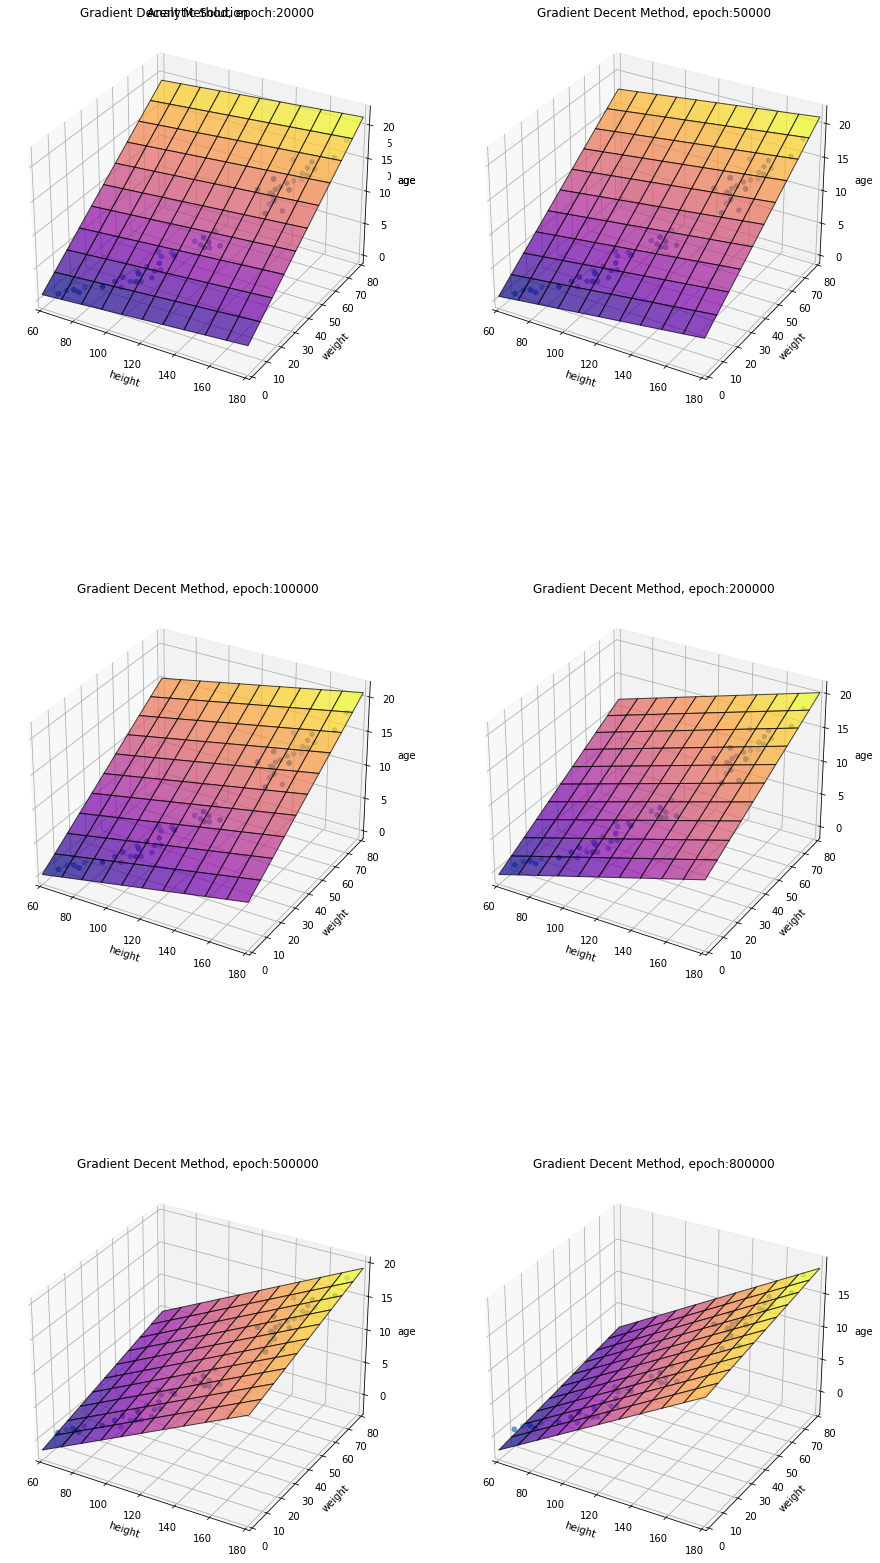

In [7]:
print("==============================")
print("|           실습 #4          |")
print("==============================")
# 경사하강법

# 기본
learning_rate = 0.000055
n_iter = 200000

np.random.seed(85) # 이후 모든 출력 값을 동일하게 하기 위해 rand값 고정
gd_theta = np.random.randn(3,) # 평균 0 표준편차 1인 정규분포따르는 -1~1사이값 가져옴
gd_theta *= 3  # -1~1의 값 증폭을 위한 값 (시그마값)
print("임의의 초기 theta값 : bias GD = {}, height GD = {}, weight GD = {}) : ".format(gd_theta[0], gd_theta[1], gd_theta[2]))
print("초기 learning rate : ",learning_rate)
print("초기 반복 값 : ", n_iter)

# theata의 매개변수 learning rate에 따른 값의 변화를 보기 위한 함수
def y_space_graph(ax, y_pred=None, rate=learning_rate, epoch=n_iter, show="origin"):
    if ax == None:
        return

    title = ""
    if show == "origin":
        title = "Analytic Solution"
    elif show=="rate":
        title = "Gradient Decent Method, rate:{}".format(rate)
    elif show=="epoch":
        title = "Gradient Decent Method, epoch:{}".format(epoch)
     # Analytic solution인지 Gradient descent인지 구분
        
    # 가장 먼저 기본 데이터를 출력
    ax.scatter(height,weight,label)
    
    if show == "origin":
        # Analytic
        ax.plot_surface(height_mesh, weight_mesh, y_space,  alpha=0.7, cmap="plasma")
    else:
        # Gradient Descent
        ax.plot_surface(height_mesh, weight_mesh, y_pred, alpha=0.7,cmap="plasma", rstride=100,cstride=100, edgecolor="black")
    ax.axis(height_lim + weight_lim)
    ax.set_title(title)
    ax.set_xlabel('height'); ax.set_ylabel('weight'); ax.set_zlabel('age', rotation=0)

tolerance = 0.000001
# 오차 계산 함수
def isStop(now_th, before_th):
    # 현재 theta와 befoe theta값에 절대값 사용하여
    # 각각의 차이 중 큰 값이 오차 허용 값보다 작을 때 참을 반환
    th_abs = np.abs(now_th) 
    before_th_abs = np.abs(before_th)
    result = (abs(th_abs - before_th_abs).max() < tolerance)
    return result

# iter과 가중치 theta값 고정 후 learning rate에 따른 값 변화
def theta_graph(rate=learning_rate, th=gd_theta, epoch=n_iter, ax=None, show="origin"):
    # 최종적으로 몇번 반복했는지 나타내는 변수
    stop_iter = 0

    # 반복 횟수를 고정한 채 진행
    for i in range(epoch):
        before_th = th

        # 행렬을 통한 기울기 계산
        gradient = 2/data_size[0] * x_bias.T.dot(x_bias.dot(th) - y)
        th = th - rate * gradient
        
        # MSE계산을 위한 y 예측값 계산 후 mse 값 계싼
        y_pred = x_bias.dot(th)
        mse = calc_mse(y_pred, y, data_size[0])

        # 가중치 값 비교를 하여 오차 범위보다 적은지 확인하는 함수 호출
        if isStop(th, before_th):
            # 오차 범위보다 적다면 멈추고 해당 횟수 저장
            stop_iter = i+1
            break

    if stop_iter == 0:
        stop_iter =  epoch
    
    # 최종 가중치(세타)값을 활용하여 y예측값 만든다.
    y_pred_graph = th[2]*weight_mesh + th[1]*height_mesh + th[0]
    y_space_graph(ax, y_pred_graph, rate, epoch, show)
    
    # 최종 가중치(세타)값을 활용하여 y예측값 만든다
    y_pred = x_bias.dot(th)
    mse = calc_mse(y_pred, y, data_size[0])
    print("[Epoch]:{}, [최종반복 횟수]:{}, [Learning rate]:{} ===> [W초기]:{}, [gradient]:{}, MSE값:{:.6f}".format(epoch, stop_iter, rate, gd_theta, th, mse))
    return th

# 그래프 출력 함수 반복횟수 고정일 때
def print_rate(func):
    fig = plt.figure(figsize=(15, 30))
    ax = fig.add_subplot(321, projection='3d')
    th = y_space_graph(ax)
    
    ax = fig.add_subplot(322, projection='3d')
    th2 = func(rate=0.0001, ax=ax, show="rate")
    
    ax = fig.add_subplot(323, projection='3d')
    th = y_space_graph(ax)
    
    ax = fig.add_subplot(324, projection='3d')
    th4 = func(rate=0.00005, ax=ax, show="rate")

    ax = fig.add_subplot(325, projection='3d')
    th = y_space_graph(ax)
    
    ax = fig.add_subplot(326, projection='3d')
    th6 = func(rate=0.000001, ax=ax, show="rate")
    plt.show()
    
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(321, projection='3d')
    th = y_space_graph(ax)
    
    ax = fig.add_subplot(322, projection='3d')
    th2 = func(rate=0.000057, ax=ax, show="rate")
    
    ax = fig.add_subplot(323, projection='3d')
    th = y_space_graph(ax)
    
    ax = fig.add_subplot(324, projection='3d')
    th4 = func(rate=0.000055, ax=ax, show="rate")

    ax = fig.add_subplot(325, projection='3d')
    th = y_space_graph(ax)
    
    ax = fig.add_subplot(326, projection='3d')
    th6 = func(rate=0.000053, ax=ax, show="rate")
    plt.show()

print("\nLearning Rate에 따른 변화")  
print_rate(theta_graph)

# learning rate 고정 후 반복 횟수 조정
def print_iter(func):
    fig = plt.figure(figsize=(15, 30))
    ax = fig.add_subplot(321, projection='3d')
    th = y_space_graph(ax)
    
    ax = fig.add_subplot(321, projection='3d')
    th1 = func(epoch=20000, ax=ax, show="epoch")

    ax = fig.add_subplot(322, projection='3d')
    th2 = func(epoch=50000, ax=ax, show="epoch")
    
    ax = fig.add_subplot(323, projection='3d')
    th3 = func(epoch=100000, ax=ax, show="epoch")

    ax = fig.add_subplot(324, projection='3d')
    th4 = func(epoch=200000, ax=ax, show="epoch")

    ax = fig.add_subplot(325, projection='3d')
    th5 = func(epoch=500000, ax=ax, show="epoch")

    ax = fig.add_subplot(326, projection='3d')
    th6 = func(epoch=800000, ax=ax, show="epoch")
    plt.show()

print("\nEpoch에 따른 변화")
print_iter(theta_graph)

In [8]:
print("==============================")
print("|           실스 #5          |")
print("==============================")

data1 = pd.read_csv("linear_regression_data01.csv", names=["age", "tall"])
print("지난 데이터:\n",data1)

# 나이를 x1, 결과인 키를 y1로 분리하여 저장
x1 = data1['age']
y1 = data1['tall']

# x1의 최대값과 최소값 저장
x1_max = max(x1)
x1_min = min(x1)
x1_size = x1.shape

# mu값 계산
# K값에 대해 배열을 반환, 각각의 값 미리 계산
def calc_mu(K):
    return [x1_min + (x1_max - x1_min) / (K - 1) * k for k in range(K)]

# sigma값 계산
# 고정된 값으로 하나의 상수
def calc_sigma(K):
    return (x1_max - x1_min) / (K-1)

# 가우스 계산
# x값 자체가 하나의 특성 데이터 전체로 들어옴
# mu는 각 배열의 원소들을 하나씩 넣어준다.
# x는 array, mu자체가 현재 k(새로운 특성)에 해당하는 값중 하나(기존 리스트에서 한개씩 함수로 전달받음) 
def calc_gauss(x, mu, sigma):
    return np.exp(-1/2 * ((x - mu)/sigma)**2)

# 각 특성마다 해당하는 mu값과 함께 가우스를 계산하여 배열에 추가
# result[i]는 각 특성 데이터 값이므로 np.array로 변환하여 T시켜
# 데이터마다 여러개의 특성을 뽑아올 수 있도록 변경
# result[0] = [특성1의 데이터1, 특성1의 데이터2] => [특성1, 특성2, 특성3 ...]  
def make_pi(x, K, mu, sigma):
    result = []
    for i in range(K):
        # 계산한 mu값은 리스트
        # mu0, mu1 mu2 ... 값을 하나하나 넣어준다.
        result.append(calc_gauss(x, mu[i], sigma))
    return np.array(result).T
    
# 가우시안 값을 구하기 위해 처음으로 호출하는 함수
def gaussian_func(K, x_data):
    # u_k = 평균, sigma = 표준편차
    mu = calc_mu(K) # mu값 구하는 함수 호출
    sigma = calc_sigma(K) # sigma값 구하는 함수 호출
    
    # 기본 데이터값을 변경하지 않기 위해 깊은 복사로 데이터 가져옴
    x_temp = x_data.copy()
    print("[K = {}] : mu={}, sigma={}".format(K,mu, sigma))

    # pi 행렬을 구하는 함수
    pi = make_pi(x_temp,K, mu,sigma)
    
    # y_hat = bias + pi_0(x) + pi_1(x) + pi_2(x) 
    pi_b = np.c_[np.ones(x1_size[0]), pi]
    return pi_b

k_list = [3,5,8,10]
pi_list = []
# k 갯수 많큼 for문 돌린다.
for i in range(len(k_list)):
    # 구한 pi 행렬을 리스트에 넣어 저장해둔다.
    # 각 값은 k_list의 K 값과 대응 된다.
    pi_list.append(gaussian_func(k_list[i], x1))

# 가중치(theta)값 구하는 함수
def calc_pi_theta(pi):
    # pinv를 사용하여 해석해를 구했습니다.
    pi_t = pi.T
    return np.linalg.pinv(pi_t.dot(pi)).dot(pi_t).dot(y1)

# theta값
theta_list = []
for i in range(len(k_list)):
    # 각각의 pi값에 대한 theta(가중치를) 리스트에 저장
    theta_list.append(calc_pi_theta(pi_list[i]))
    print("K = {}:[GD,(bias, 0,1,...)]:{}\n".format(k_list[i], theta_list[i]))

|           실스 #5          |
지난 데이터:
      age  tall
0   14.3  21.6
1    5.3  11.2
2    9.2  19.1
3   11.0  21.1
4    9.9  18.1
5   14.9  23.3
6   11.6  21.9
7    8.0  17.4
8   13.1  22.5
9   14.8  23.2
10   5.7  12.5
11   8.2  16.6
12   7.2  15.2
13  10.0  18.7
14   9.1  17.2
15  13.0  21.6
16  10.3  19.3
17   5.9  12.2
18   6.1  12.8
19  15.0  22.4
20  10.3  21.3
21  15.0  21.6
22  11.3  22.1
23   8.0  16.4
24  11.8  22.4
[K = 3] : mu=[5.3, 10.149999999999999, 15.0], sigma=4.85
[K = 5] : mu=[5.3, 7.725, 10.149999999999999, 12.575, 15.0], sigma=2.425
[K = 8] : mu=[5.3, 6.685714285714285, 8.071428571428571, 9.457142857142856, 10.842857142857142, 12.228571428571428, 13.614285714285714, 15.0], sigma=1.3857142857142857
[K = 10] : mu=[5.3, 6.377777777777777, 7.455555555555556, 8.533333333333333, 9.61111111111111, 10.688888888888888, 11.766666666666666, 12.844444444444445, 13.92222222222222, 15.0], sigma=1.0777777777777777
K = 3:[GD,(bias, 0,1,...)]:[ 5.34004445  0.99557866  5.90764664 13.1

|           실스 #6          |
[[14.3        22.6188793  22.32644002 22.32985749 22.01039668]
 [ 5.3        11.6971529  12.10963159 11.40545271 11.19035298]
 [ 9.2        18.28379013 18.43977712 17.99664155 17.81473978]
 [11.         21.00872677 20.81383464 21.27944544 21.29832168]
 [ 9.9        19.4343873  19.2767704  18.95939053 18.92660114]
 [14.9        22.27507805 22.33159704 22.52036544 22.61746602]
 [11.6        21.69534796 21.68403695 22.26693403 22.1571967 ]
 [ 8.         16.18481198 16.60469613 16.69777821 16.81944276]
 [13.1        22.69296641 22.71285058 21.85444645 21.89517239]
 [14.8        22.34632533 22.30220949 22.55466441 22.68596105]
 [ 5.7        12.30040551 12.06590257 12.03212366 12.18620971]
 [ 8.2        16.5391025  16.98406955 16.95623801 17.11621933]
 [ 7.2        14.77754791 14.79893374 15.31023724 14.97716189]
 [10.         19.59102726 19.40212463 19.13755423 19.15647734]
 [ 9.1        18.11320863 18.31762795 17.89054505 17.73675832]
 [13.         22.66255438 

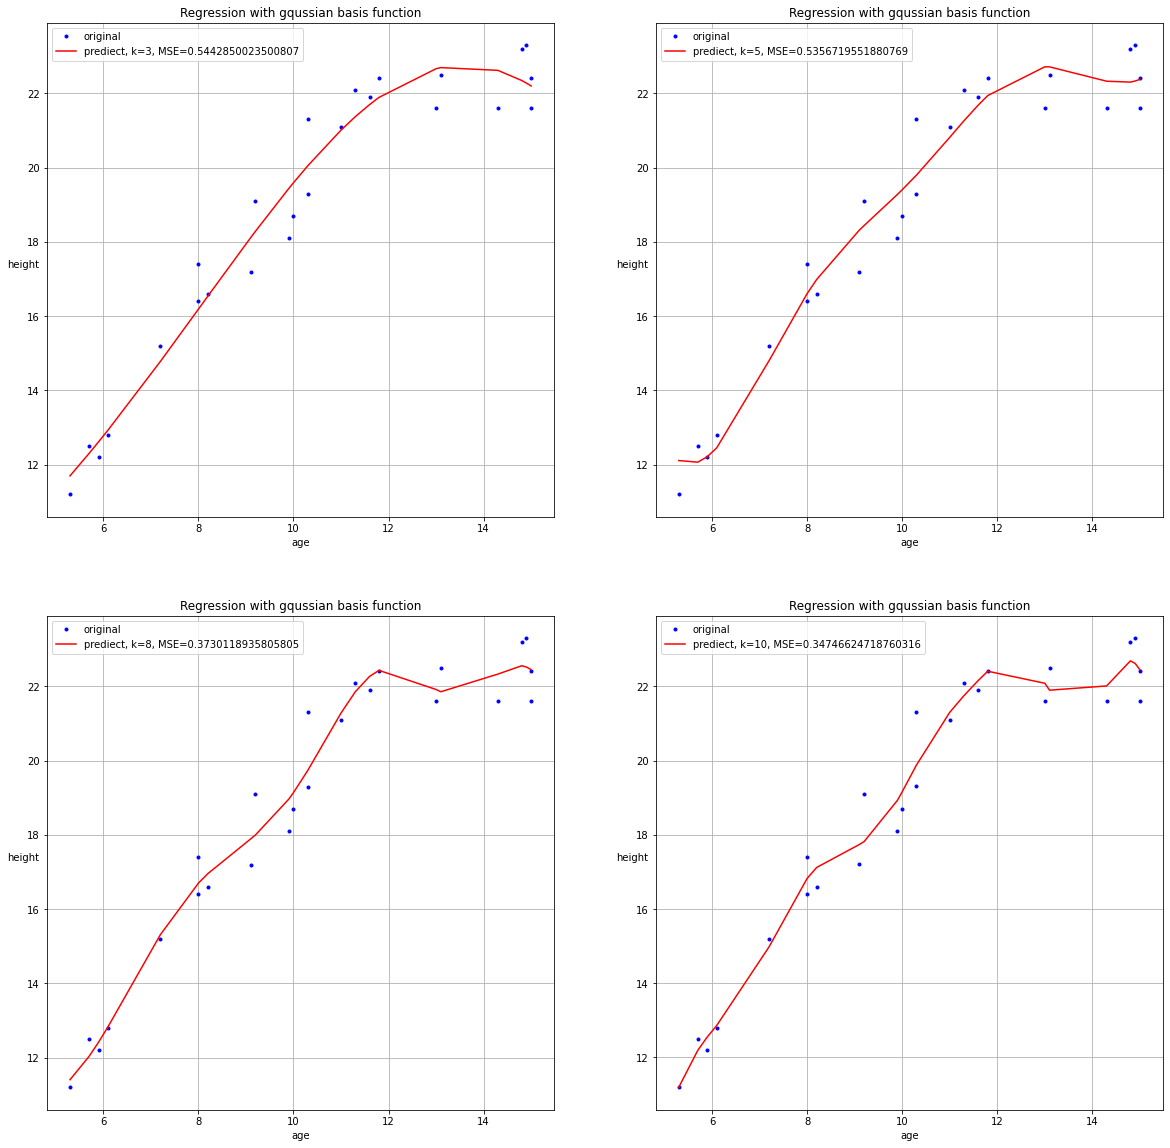

In [9]:
print("==============================")
print("|           실스 #6          |")
print("==============================")

# y 예측 값과 mse 값을 구합니다.
y1_list= []
mse_pi_list = []

for i in range(len(k_list)):
    # 위에서 구한 pi값과 theta값을 사용하여 y 예측값을 구하고 리스트에 저장
    y1_list.append(pi_list[i].dot(theta_list[i]))
    # 저장한 y예측값과 실제 y값을 통해 mse를 구하기 위해
    # 위에서 선언한 mse구하는 함수 호출하여 mse값을 저장합니다.
    mse_pi_list.append(calc_mse(y1_list[i], y1, x1_size[0]))

# 실습 6 출력 함수
def show_graph6():
    # 그래프에서 y예측값 출력은 직선으로 되어있어서 데이터를 정렬할 필요가 있습니다.
    # 따라서 x와 y예측값을 같이 묶어주기 위해 show_data 선언
    show_data = np.array(x1)
    
    # 출력할 예측값의 갯수는 k값의 갯수입니다.
    # y1_list는 4 X 25의 형태이므로 한개씩 넣어줬습니다.
    for i in range(len(k_list)):
        # 매번 옆에 하나의 y예측값들을 넣습니다.
        show_data = np.c_[show_data, y1_list[i]]    
    print(show_data)

    # 해당 데이터 집합은 x데이터의 순서대로 정렬해야 하므로
    # show_data[0]을 기준으로 정렬합니다.
    show_data = sorted(show_data, key = lambda x : x[0])
    # 정렬 후 하나의 데이터는 [x값, y1예측값, y2예측값, y3예측값, y4예측값]
    # 형태이므로 transpose하여 show_data[0] = [x값들], 
    #                         show_data[1~4] = [y예측값들] 이 나오게 한다.
    show_data = np.array(show_data).T
    print(show_data)

    # 그래프 출력
    plt.figure(figsize=(20, 20))
    for i in range(4):
        plt.subplot(2,2,1 + i); 
        # 원본 데이터
        plt.plot(x1, y1, 'b.', label="original")
        # y예측 값
        plt.plot(show_data[0], show_data[i+1], 'r-', label="prediect, k={}, MSE={}".format(k_list[i],mse_pi_list[i]))
        plt.xlabel("age")
        plt.ylabel("height", rotation=0)
        plt.title("Regression with gqussian basis function")
        plt.legend(loc="upper left")
        plt.grid(True)
    plt.show()
show_graph6()

|           실스 #7          |
K가 0일때 MSE : 0.5442850023500807
K가 1일때 MSE : 0.5356719551880769
K가 2일때 MSE : 0.3730118935805805
K가 3일때 MSE : 0.34746624718760316


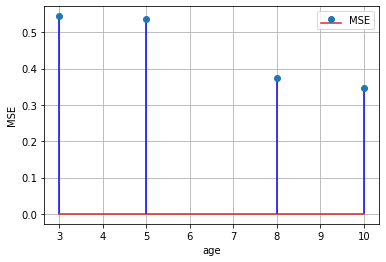

In [10]:


print("==============================")
print("|           실스 #7          |")
print("==============================")

# 이미 위에서 한번 구현했습니다.
#mse_pi_list = []
for i in range(len(k_list)):
    # 저장한 y예측값과 실제 y값을 통해 mse를 구하기 위해
    # 위에서 선언한 mse구하는 함수 호출하여 mse값을 저장합니다.
    #mse_pi_list.append(calc_mse(y1_list[i], y1, x1_size[0]))
    print("K가 {}일때 MSE : {}".format(i,mse_pi_list[i]))

plt.figure()
plt.stem(k_list,mse_pi_list, 'b.', label="MSE")
plt.xlabel("age")
plt.ylabel("MSE")
plt.grid()
plt.legend(loc = "upper right")
plt.show()